Epoch 1/20
288/288 [==============================] - 2s 6ms/step - loss: 0.3044 - accuracy: 0.8500 - val_loss: 0.2804 - val_accuracy: 0.8648
Epoch 2/20
288/288 [==============================] - 2s 6ms/step - loss: 0.2616 - accuracy: 0.8769 - val_loss: 0.2529 - val_accuracy: 0.8752
Epoch 3/20
288/288 [==============================] - 2s 6ms/step - loss: 0.2405 - accuracy: 0.8878 - val_loss: 0.2373 - val_accuracy: 0.8861
Epoch 4/20
288/288 [==============================] - 2s 6ms/step - loss: 0.2268 - accuracy: 0.8965 - val_loss: 0.2307 - val_accuracy: 0.8874
Epoch 5/20
288/288 [==============================] - 2s 6ms/step - loss: 0.2170 - accuracy: 0.9044 - val_loss: 0.2231 - val_accuracy: 0.8965
Epoch 6/20
288/288 [==============================] - 2s 5ms/step - loss: 0.2064 - accuracy: 0.9088 - val_loss: 0.2207 - val_accuracy: 0.8970
Epoch 7/20
288/288 [==============================] - 2s 5ms/step - loss: 0.2000 - accuracy: 0.9126 - val_loss: 0.2255 - val_accuracy: 0.8961
Epoch 

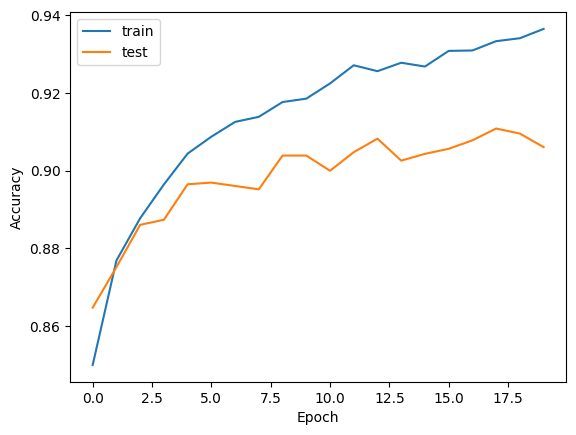

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5409      
                                                                 
Total params: 5729 (22.38 KB)
Trainable params: 5729 (22.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


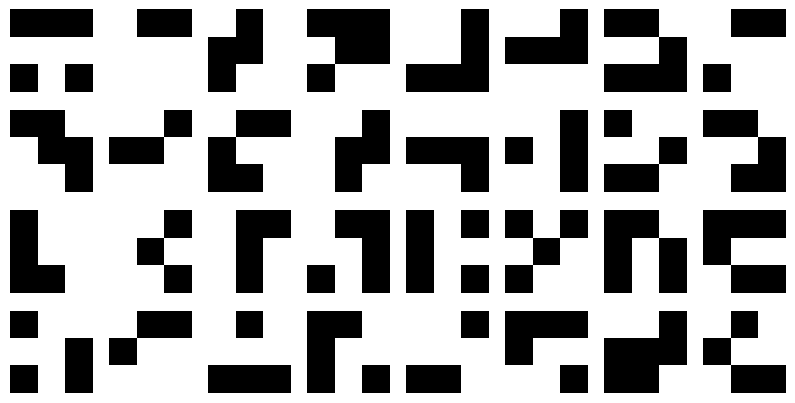

1/1 [==============================] - 0s 27ms/step


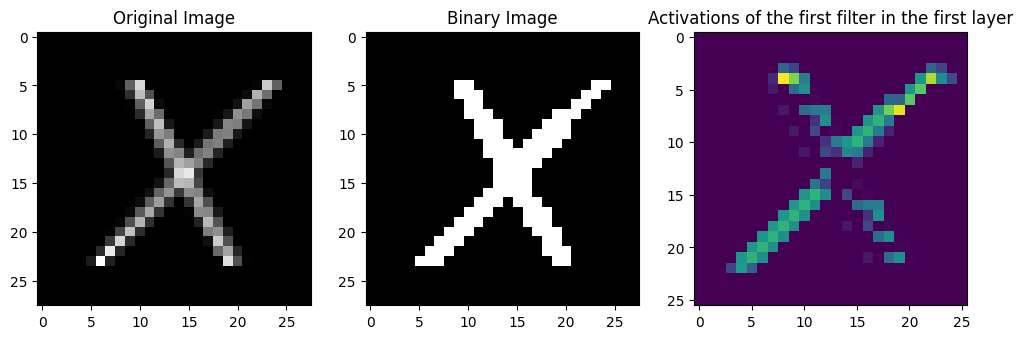

Binary Weights for layer: [[[[-1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1
    -1 -1 -1  1  1 -1  1 -1  1  1]]

  [[-1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1
    -1 -1  1 -1 -1 -1  1 -1  1 -1]]

  [[-1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1
     1 -1  1 -1  1  1 -1 -1 -1  1]]]


 [[[ 1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1
    -1 -1  1 -1  1 -1  1 -1 -1 -1]]

  [[ 1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1
     1  1  1  1  1  1  1  1 -1  1]]

  [[ 1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1
    -1  1 -1  1  1  1  1  1 -1  1]]]


 [[[-1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1
    -1  1 -1  1 -1 -1 -1  1 -1  1]]

  [[ 1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1
     1 -1  1  1 -1  1 -1  1 -1 -1]]

  [[-1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1  1
    -1 -1 -1  1 -1 -1  1 -1  1 -1]]]]
Biases

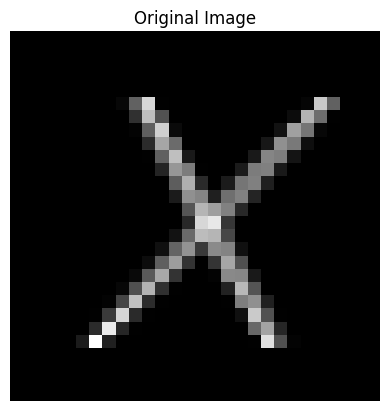

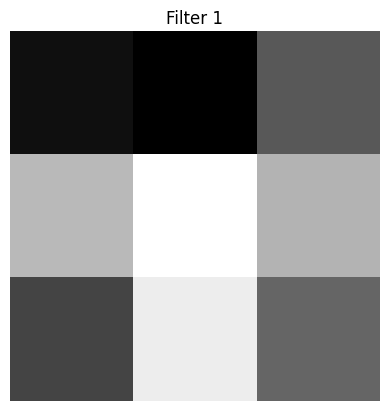

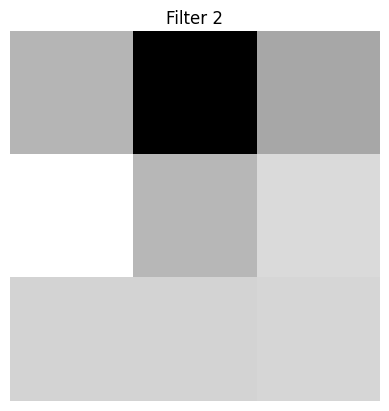

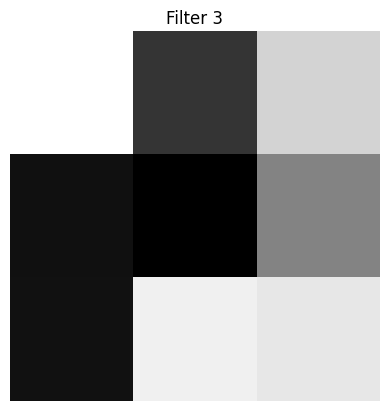

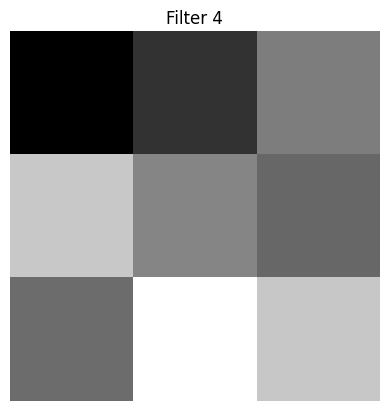

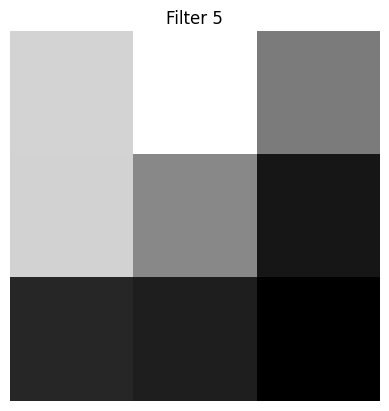

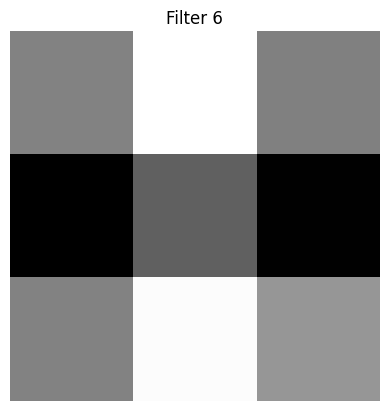

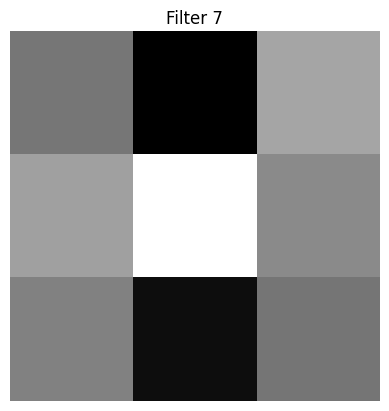

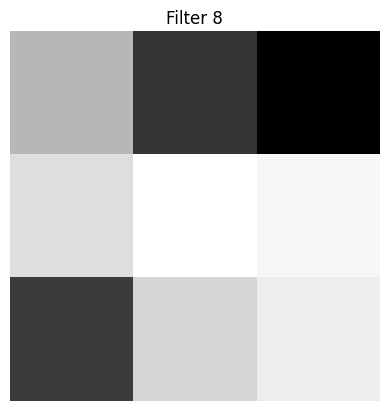

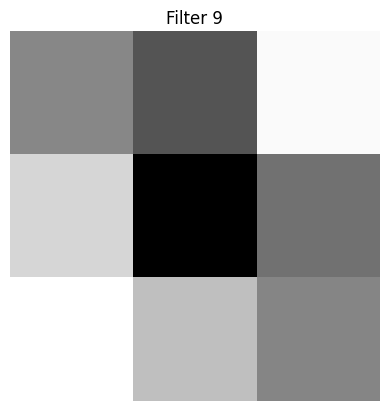

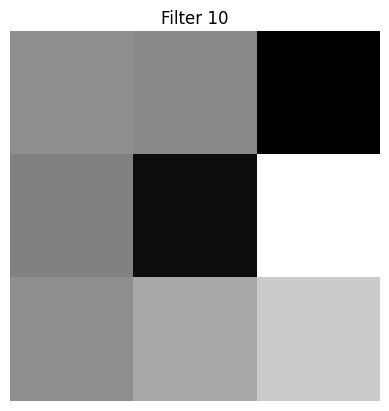

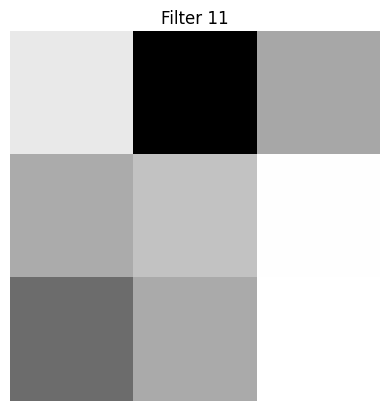

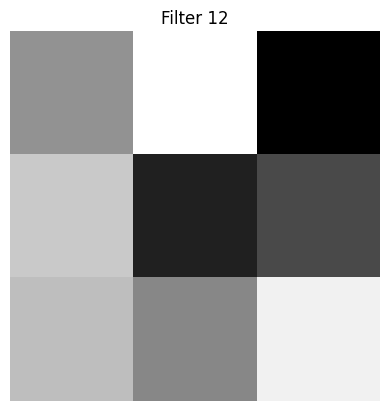

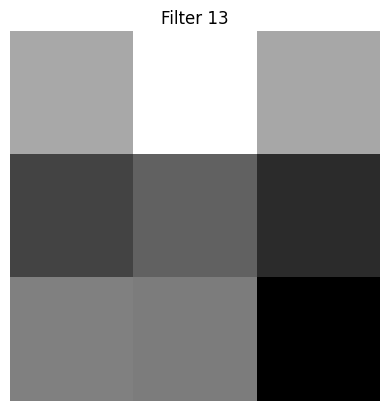

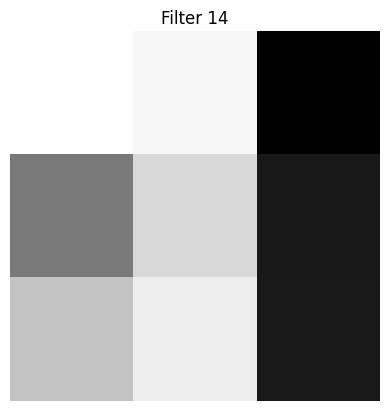

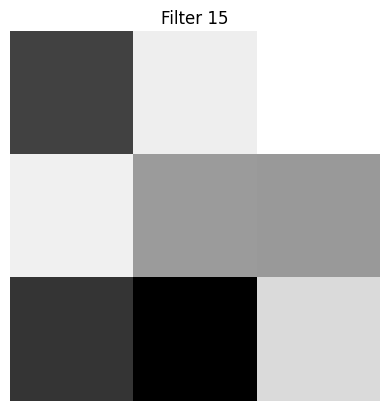

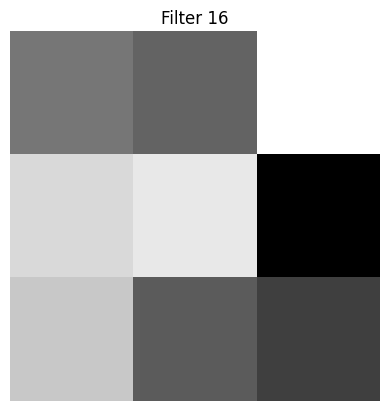

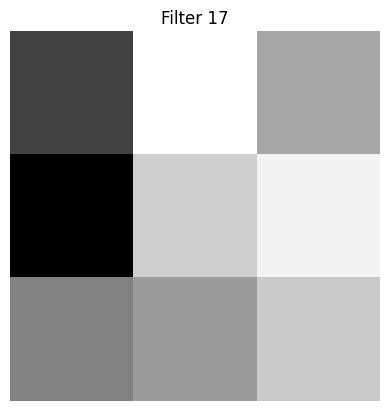

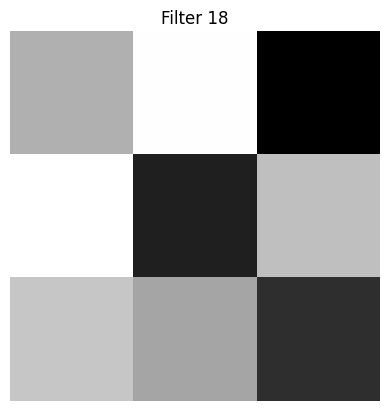

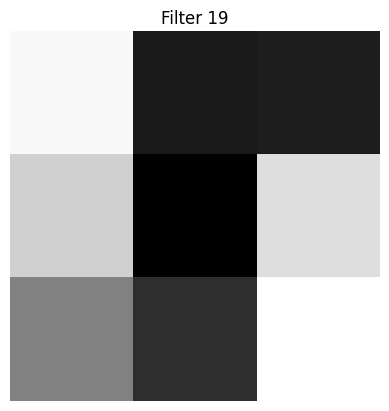

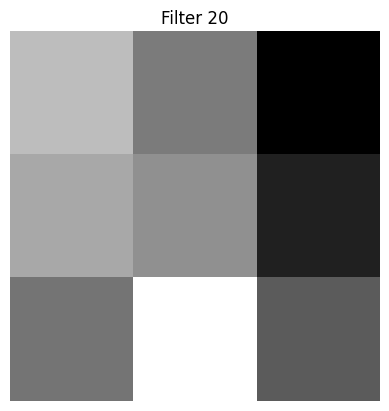

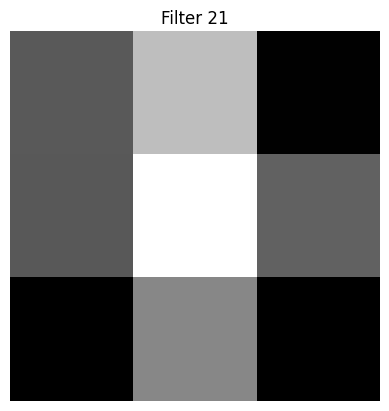

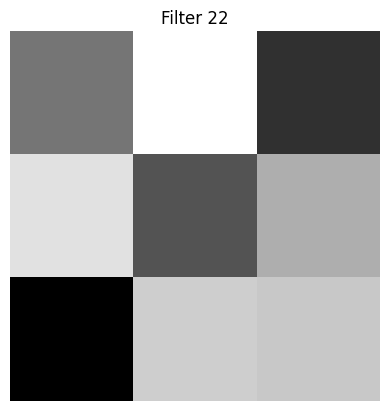

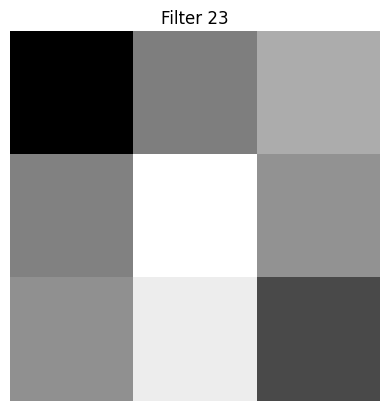

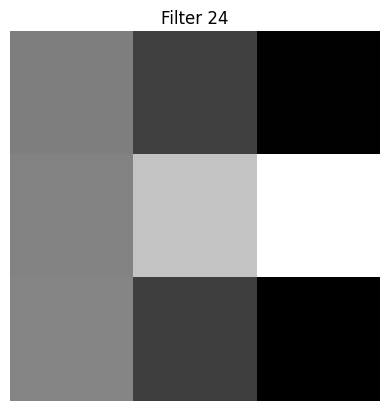

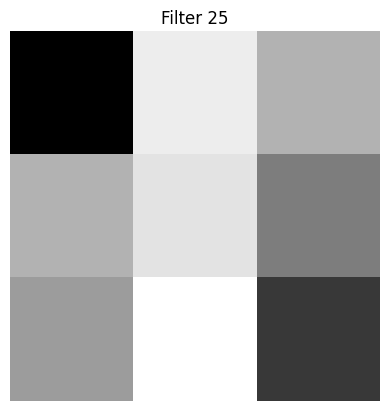

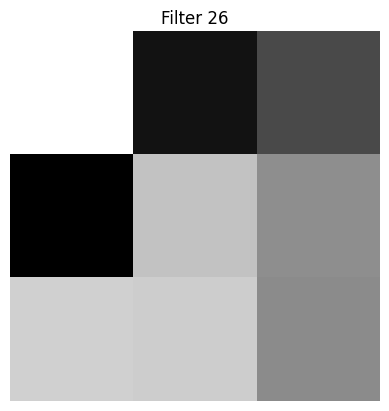

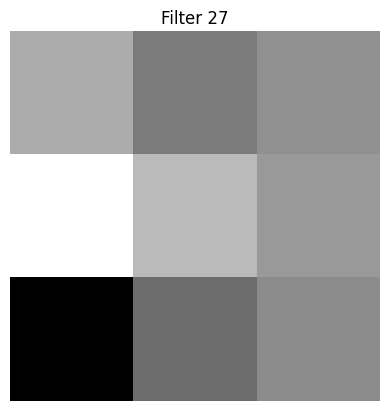

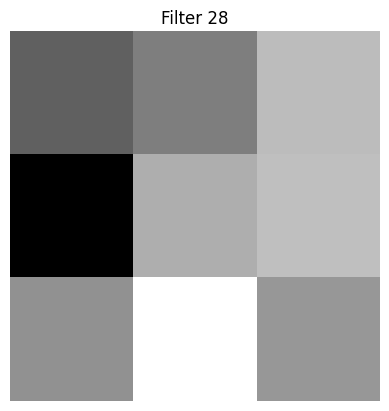

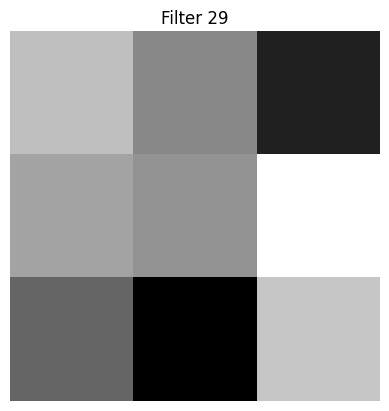

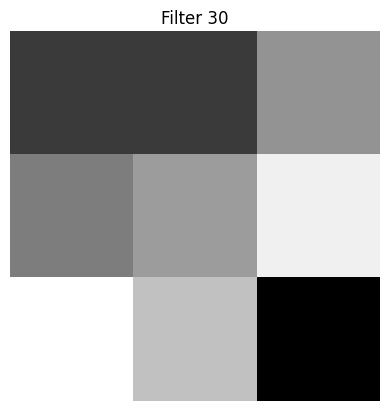

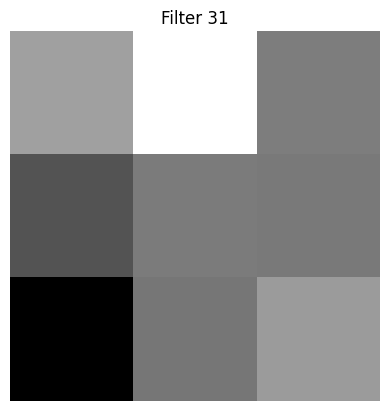

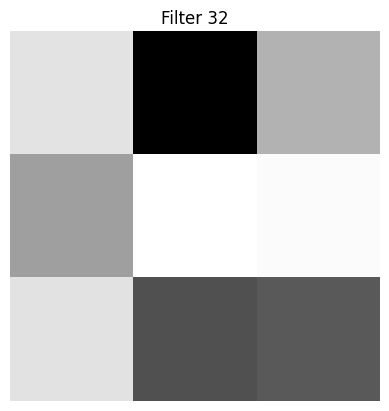

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataset
data = pd.read_csv(r'C:\Users\Windows\Downloads\archive\2_character_TMNIST.csv')  # Update the path to your dataset file

# Separate data into features (X) and labels (y)
X = data.drop(columns=['names', 'labels'])
y = data['labels']

# Convert 'X' and 'O' labels to binary values (1 for 'X' and 0 for 'O')
y_binary = (y == 'X').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert grayscale to binary
X_train_binary = (X_train > 0.05).astype(float)
X_test_binary = (X_test > 0.05).astype(float)

# Create a CNN model with binary filters
binary_model = Sequential()
binary_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
binary_model.add(MaxPooling2D((2, 2)))
binary_model.add(Flatten())
binary_model.add(Dense(1, activation='sigmoid'))

# Compile the model
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for more epochs
history = binary_model.fit(X_train_binary, y_train, epochs=20, validation_data=(X_test_binary, y_test))

# Evaluate the model
test_loss, test_accuracy = binary_model.evaluate(X_test_binary, y_test)
print(f'Test accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Summary (Architecture)
binary_model.summary()

# Visualize binary filters
binary_filters, biases = binary_model.layers[0].get_weights()
plt.figure(figsize=(10, 5))
for i in range(binary_filters.shape[3]):
    binary_filters[:, :, 0, i] = 2 * (binary_filters[:, :, 0, i] > 0) - 1  # Convert 0 to -1 and 1 to 1
    plt.subplot(4, 8, i + 1)
    plt.imshow(binary_filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

# Visualize activations
from tensorflow.keras.models import Model

# Create a model to output the activations of the first layer
activation_model = Model(inputs=binary_model.input, outputs=binary_model.layers[0].output)

# Get activations for a sample input
sample_activation = activation_model.predict(X_train_binary[0].reshape(1, 28, 28, 1))

# Visualize original, normalized, and binary images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(X_train_binary[0].reshape(28, 28), cmap='gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(sample_activation[0, :, :, 0], cmap='viridis')
plt.title('Activations of the first filter in the first layer')

plt.show()

# Set print options to display the entire array
np.set_printoptions(threshold=np.inf)

# Print final binary weights
for layer in binary_model.layers:
    if layer.get_weights():
        binary_weights, biases = layer.get_weights()
        binary_weights = 2 * (binary_weights > 0) - 1  # Convert 0 to -1 and 1 to 1
        print(f"Binary Weights for layer: {binary_weights}")
        print(f"Biases for layer: {biases}")

# Print final binary weights and biases for all layers
for layer in binary_model.layers:
    if isinstance(layer, Dense) and layer.get_weights():
        binary_weights, biases = layer.get_weights()
        binary_weights = 2 * (binary_weights > 0) - 1  # Convert 0 to -1 and 1 to 1
        print(f"Binary Weights for Dense layer: {binary_weights}")
        print(f"Biases for Dense layer: {biases}")

# Reset print options to default
np.set_printoptions(threshold=8)

# Visualize and save binary filters as arrays
binary_filters, biases = binary_model.layers[0].get_weights()

# Set print options to display the entire array
np.set_printoptions(threshold=np.inf)

# Display original image
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display and save binary filters as arrays
with open('binary_filters.txt', 'w') as file:
    for i in range(binary_filters.shape[3]):
        binary_filter_array = binary_filters[:, :, 0, i]
        plt.imshow(binary_filter_array, cmap='gray')
        plt.title(f'Filter {i + 1}')
        plt.axis('off')
        plt.show()
        print(f"Binary Weights for Filter {i + 1}:\n{binary_filter_array}\n{'-' * 40}", file=file)

# Reset print options to default
np.set_printoptions(threshold=8)


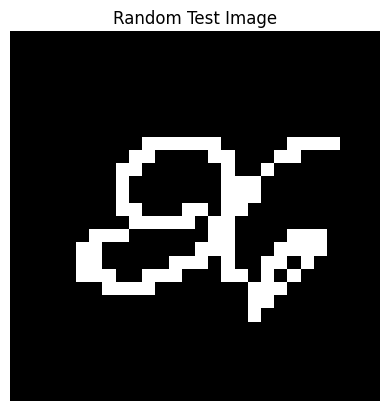

1/1 [==============================] - 0s 30ms/step
True Label: X
Model Decision: O
Confidence Score: 6.45%
Prediction [[0.06449882]]


In [127]:
import random

# Select a random index from the test dataset
random_index = random.randint(0, len(X_test_binary) - 1)

# Get the input image and its true label
input_image = X_test_binary[random_index].reshape(1, 28, 28, 1)
true_label = y_test.iloc[random_index]





# Display the input image
plt.imshow(X_test_binary[random_index].reshape(28, 28), cmap='gray')
plt.title('Random Test Image')
plt.axis('off')
plt.show()

# Get the model's prediction
prediction = binary_model.predict(input_image)
confidence_score = prediction[0][0]

# Convert confidence score to percentage
confidence_percentage = confidence_score * 100

# Make a decision based on the model's prediction
model_decision = "X" if prediction > 0.3 else "O"

# Display the model's decision and confidence score
print(f"True Label: {'X' if true_label == 1 else 'O'}")
print(f"Model Decision: {model_decision}")
print(f"Confidence Score: {confidence_percentage:.2f}%")
print('Prediction', prediction)


In [128]:
import random
Accuracies = []
for i in range(0,1001):

    # Select a random index from the test dataset
    random_index = random.randint(0, len(X_test_binary) - 1)

    # Get the input image and its true label
    input_image = X_test_binary[random_index].reshape(1, 28, 28, 1)
    true_label = y_test.iloc[random_index]



    # Get the model's prediction
    prediction = binary_model.predict(input_image)
    confidence_score = prediction[0][0]

    # Convert confidence score to percentage
    confidence_percentage = confidence_score * 100

    # Make a decision based on the model's prediction
    model_decision = "X" if prediction > 0.5 else "O"
    if model_decision == "O":
        confidence_percentage = 100-confidence_percentage
    Accuracies.append(confidence_percentage)

print(np.average(Accuracies))


1/1 [==============================] - 0s 13ms/step
89.42883678481209
